In [0]:
from fastai.collab import *
from fastai.tabular import *

## test with example data

In [0]:
path = untar_data(URLs.ML_SAMPLE)

## Full data - official download link : http://files.grouplens.org/datasets/movielens/ml-100k.zip

### data download

In [0]:
path = Config.data_path()

In [0]:
import requests
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-100k.zip")
with open(path/'ml-100k.zip', "wb") as f:
    for chunk in r.iter_content(chunk_size=128):
        f.write(chunk)
    

In [0]:
!unzip {path/'ml-100k.zip'} -d {path}

In [0]:
data_path = path/'ml-100k'
data_path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/ub.test'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u2.base'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/ua.base'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u.genre'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u.item'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u.occupation'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u2.test'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u4.test'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/mku.sh'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u5.base'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u3.base'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/u.user'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/allbut.pl'),
 PosixPath('/root/.fastai/data/movie_lens_sample/ml-100k/README'),
 PosixPath('/root/.fastai/data/movie_lens_sam

Looking through the data

In [0]:
pd.read_csv(data_path/'u.info', encoding='latin-1', header=None)

,0
0,943 users
1,1682 items
2,100000 ratings


In [0]:
pd.read_csv(data_path/'u.user', encoding='latin-1', delimiter='|', header=None)

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [0]:
u_occ=pd.read_csv(data_path/'u.occupation', encoding='latin-1')
u_occ.values

array([['artist'],
       ['doctor'],
       ['educator'],
       ['engineer'],
       ['entertainment'],
       ['executive'],
       ['healthcare'],
       ['homemaker'],
       ['lawyer'],
       ['librarian'],
       ['marketing'],
       ['none'],
       ['other'],
       ['programmer'],
       ['retired'],
       ['salesman'],
       ['scientist'],
       ['student'],
       ['technician'],
       ['writer']], dtype=object)

### getting rating matrix -> item / data

In [0]:
items = pd.read_csv(data_path/'u.item', encoding='latin-1', delimiter='|',header=None,
            names = [item, title, 'year', 'N', 'URL', *[f'g({i})' for i in range(19)]]            
            )
len(items)

1682

In [0]:
data = pd.read_csv(data_path/'u.data', encoding='latin-1', sep='\t', header=None, names=[user, item, 'ratings', 'timestamp']); data.head(10)

,userId,movieId,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013



for comprehension, substitute movieid with title

In [78]:
rating_matrix = data.merge(items[[item, title]]); rating_matrix.head(10)

,userId,movieId,ratings,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [0]:
data_bunch = CollabDataBunch.from_df(rating_matrix, valid_pct=0.1, item_name=title, seed=42)

In [0]:
data_bunch.show_batch()

userId,title,target
445,Sabrina (1995),2.0
56,"Nightmare on Elm Street, A (1984)",5.0
599,I Know What You Did Last Summer (1997),4.0
804,"Day the Earth Stood Still, The (1951)",4.0
650,Rear Window (1954),4.0


In [0]:
learn = collab_learner( data_bunch, n_factors=40, y_range=[0,5.5], wd=1e-01)

In [74]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-01
Min loss divided by 10: 2.51E-02


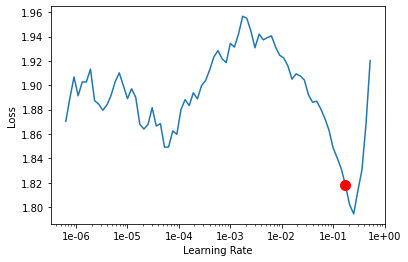

In [75]:
learn.recorder.plot(skip_end=15, suggestion=True)

In [76]:
learn.fit_one_cycle(5, 2.51E-02)
learn.save('stage-1')

epoch,train_loss,valid_loss,time
0,1.028524,1.064036,00:10
1,1.100684,1.106313,00:10
2,0.962634,0.996034,00:10
3,0.815722,0.856966,00:10
4,0.605413,0.837510,00:10


## Interpretation

### Setup
- most seen movie dataframe, select only 1000,


In [90]:
item_freq = rating_matrix.groupby(title).ratings.count();

[Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
        '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
        '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
        '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
        ...
        'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
        'Young Frankenstein (1974)', 'Young Guns (1988)',
        'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
        'Zeus and Roxanne (1997)', 'unknown',
        'Á köldum klaka (Cold Fever) (1994)'],
       dtype='object', name='title', length=1664)]


### bias

sort movie depends on most seen movie.

In [0]:
item_freq.sort_values(ascending=False, inplace=True)

In [126]:
movie_all = item_freq.index.values

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

ERROR! Session/line number was not unique in database. History logging moved to new session 61


load learned `movie bias` parameter

In [127]:
mb = learn.bias(movie_all)

You're trying to access an item that isn't in the training data.
                  If it was in your original data, it may have been split such that it's only in the validation set now.


TypeError: ignored

`You're trying to access an item that isn't in the training data.
                  If it was in your original data, it may have been split such that it's only in the validation set now.`

In [0]:
mb = learn.bias(movie_all[:1300]) #changed to 100

average the movie ratings.


In [152]:
avg = rating_matrix.groupby(title).ratings.mean(); avg[:5]

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: ratings, dtype: float64

In [157]:
[f'N.{i+1}, {item_freq[i]} rated, {v}, rating: {avg[v]:.3f}' for i, v in enumerate(movie_all[:10])]  

['N.1, 583 rated, Star Wars (1977), rating: 4.358',
 'N.2, 509 rated, Contact (1997), rating: 3.804',
 'N.3, 508 rated, Fargo (1996), rating: 4.156',
 'N.4, 507 rated, Return of the Jedi (1983), rating: 4.008',
 'N.5, 485 rated, Liar Liar (1997), rating: 3.157',
 'N.6, 481 rated, English Patient, The (1996), rating: 3.657',
 'N.7, 478 rated, Scream (1996), rating: 3.441',
 'N.8, 452 rated, Toy Story (1995), rating: 3.878',
 'N.9, 431 rated, Air Force One (1997), rating: 3.631',
 'N.10, 429 rated, Independence Day (ID4) (1996), rating: 3.438']

arrange (bias[i], mostly seen[i], rating avg[i]) and sort ky bias. ascending and descening

In [0]:
bias_tuple = [(b, tle, avg[tle]) for b, tle in zip(mb, movie_all[:100])]

In [159]:
sorted(bias_tuple, key = itemgetter(0))[:10]

[(tensor(-0.0995), 'Volcano (1997)', 2.808219178082192),
 (tensor(-0.0329), 'Broken Arrow (1996)', 3.031496062992126),
 (tensor(-0.0316), 'Evita (1996)', 2.9806949806949805),
 (tensor(-0.0292), "Dante's Peak (1997)", 2.933333333333333),
 (tensor(0.0581), 'Murder at 1600 (1997)', 3.0871559633027523),
 (tensor(0.0769), "Devil's Own, The (1997)", 3.1083333333333334),
 (tensor(0.1038), 'Liar Liar (1997)', 3.156701030927835),
 (tensor(0.1078), 'Twister (1996)', 3.2150170648464163),
 (tensor(0.1155), 'Saint, The (1997)', 3.1234177215189876),
 (tensor(0.1742), 'Mission: Impossible (1996)', 3.313953488372093)]

In [160]:
sorted(bias_tuple, key = itemgetter(0), reverse=True)[:10]

[(tensor(0.8650), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.8147), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.8005), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.7782), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.7671), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.7615), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.7280), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.7063), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.6968), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667),
 (tensor(0.6828), 'Godfather, The (1972)', 4.283292978208232)]


### weight

load weight depends on most seen movie, lesson factors 40 to 3, sort movie title depends on each factor.


In [0]:
mw = learn.weight(movie_all[:1300])

In [164]:
mw.shape

torch.Size([1300, 40])

In [0]:
ld0, ld1, ld2 = mw.pca(3).t()

In [171]:
ld0.shape

torch.Size([1300])

In [174]:
sorted([(i,j) for i, j in zip(ld0, movie_all[:1300])], key=itemgetter(0), reverse=True)[:20]

[(tensor(1.1216), 'Jungle2Jungle (1997)'),
 (tensor(0.9222), 'Congo (1995)'),
 (tensor(0.9222), 'Down Periscope (1996)'),
 (tensor(0.8669), 'Bio-Dome (1996)'),
 (tensor(0.8663), 'D3: The Mighty Ducks (1996)'),
 (tensor(0.8648), "McHale's Navy (1997)"),
 (tensor(0.8421), 'Beautician and the Beast, The (1997)'),
 (tensor(0.8385), 'Ghost and the Darkness, The (1996)'),
 (tensor(0.8381), 'Grumpier Old Men (1995)'),
 (tensor(0.8138), 'Striking Distance (1993)'),
 (tensor(0.7659), 'Murder at 1600 (1997)'),
 (tensor(0.7655), 'Home Alone 3 (1997)'),
 (tensor(0.7507), 'Twister (1996)'),
 (tensor(0.7502), 'Body Parts (1991)'),
 (tensor(0.7365), 'Volcano (1997)'),
 (tensor(0.7341), 'G.I. Jane (1997)'),
 (tensor(0.7302), 'Net, The (1995)'),
 (tensor(0.7212), 'Leave It to Beaver (1997)'),
 (tensor(0.7206), 'Batman & Robin (1997)'),
 (tensor(0.7019), 'First Knight (1995)')]